In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import numpy as np
from sqlalchemy import func
from sqlalchemy import desc

In [5]:
base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")
base.prepare(engine,reflect=True)

conn = sqlite3.connect("hawaii.sqlite")
cur = conn.cursor()
res=cur.execute("SELECT name FROM sqlite_master WHERE type='table'ORDER BY name;")
for name in res:
    print(name[0])

Measurements
Stations


In [6]:
measurement = base.classes.Measurements
station = base.classes.Stations
session=Session(engine)

In [7]:
date_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= "2016-08-23")

In [8]:
df = date_prcp.all()

In [9]:
new_df = pd.DataFrame(df)
new_df.set_index("date", inplace = True)
new_df

,prcp
date,
2016-08-23,0.0
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.0
2016-08-27,0.0
2016-08-28,0.01
2016-08-29,0.0
2016-08-30,0.0
2016-08-31,0.13


In [39]:
plotdata = new_df['prcp'].astype(float)
plotdata

date
2016-08-23    0.00
2016-08-24    0.08
2016-08-25    0.08
2016-08-26    0.00
2016-08-27    0.00
2016-08-28    0.01
2016-08-29    0.00
2016-08-30    0.00
2016-08-31    0.13
2016-09-01    0.00
2016-09-02    0.00
2016-09-03    0.00
2016-09-04    0.03
2016-09-05    0.00
2016-09-06    0.00
2016-09-07    0.05
2016-09-08    0.00
2016-09-09    0.03
2016-09-10    0.00
2016-09-11    0.05
2016-09-12    0.00
2016-09-13    0.02
2016-09-14    1.32
2016-09-15    0.42
2016-09-16    0.06
2016-09-17    0.05
2016-09-18    0.00
2016-09-19    0.00
2016-09-20    0.00
2016-09-21    0.00
              ... 
2017-07-24    0.84
2017-07-25    0.30
2017-07-26    0.30
2017-07-27    0.00
2017-07-28    0.40
2017-07-29    0.30
2017-07-30    0.30
2017-07-31    0.00
2017-08-01    0.00
2017-08-02    0.25
2017-08-03    0.06
2017-08-05    0.00
2017-08-06    0.00
2017-08-07    0.05
2017-08-08    0.34
2017-08-09    0.15
2017-08-10    0.07
2017-08-11    0.00
2017-08-12    0.14
2017-08-13    0.00
2017-08-14    0.22
2017-08

C:\Users\HARSHILL\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


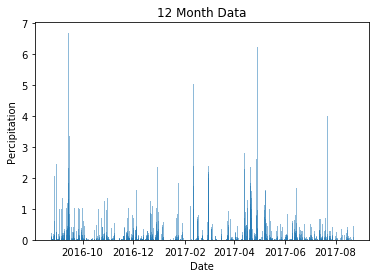

In [42]:
y_pos = np.arange(len(new_df))
plt.bar(new_df.index.to_datetime(), new_df["prcp"], align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.title("12 Month Data")
plt.show()


In [12]:
new_df.describe()

,prcp
count,2230
unique,160
top,0.0
freq,1083


In [13]:
session.query(station).count()

9

In [14]:
q = session.query(measurement.station, func.count(measurement.date)).\
    group_by(measurement.station).\
    order_by(desc(func.count(measurement.date))).all()
q

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
q = session.query(measurement.tobs).\
    filter(measurement.date >= "2016-08-23").\
    filter(measurement.station == "USC00519281").all()
q

[('77.0'),
 ('77.0'),
 ('80.0'),
 ('80.0'),
 ('75.0'),
 ('73.0'),
 ('78.0'),
 ('77.0'),
 ('78.0'),
 ('80.0'),
 ('80.0'),
 ('78.0'),
 ('78.0'),
 ('78.0'),
 ('73.0'),
 ('74.0'),
 ('80.0'),
 ('79.0'),
 ('77.0'),
 ('80.0'),
 ('76.0'),
 ('79.0'),
 ('75.0'),
 ('79.0'),
 ('78.0'),
 ('79.0'),
 ('78.0'),
 ('78.0'),
 ('76.0'),
 ('74.0'),
 ('77.0'),
 ('78.0'),
 ('79.0'),
 ('79.0'),
 ('77.0'),
 ('80.0'),
 ('78.0'),
 ('78.0'),
 ('78.0'),
 ('77.0'),
 ('79.0'),
 ('79.0'),
 ('79.0'),
 ('79.0'),
 ('75.0'),
 ('76.0'),
 ('73.0'),
 ('72.0'),
 ('71.0'),
 ('77.0'),
 ('79.0'),
 ('78.0'),
 ('79.0'),
 ('77.0'),
 ('79.0'),
 ('77.0'),
 ('78.0'),
 ('78.0'),
 ('78.0'),
 ('78.0'),
 ('77.0'),
 ('74.0'),
 ('75.0'),
 ('76.0'),
 ('73.0'),
 ('76.0'),
 ('74.0'),
 ('77.0'),
 ('76.0'),
 ('76.0'),
 ('74.0'),
 ('75.0'),
 ('75.0'),
 ('75.0'),
 ('75.0'),
 ('71.0'),
 ('63.0'),
 ('70.0'),
 ('68.0'),
 ('67.0'),
 ('77.0'),
 ('74.0'),
 ('77.0'),
 ('76.0'),
 ('76.0'),
 ('75.0'),
 ('76.0'),
 ('75.0'),
 ('73.0'),
 ('75.0'),
 ('73.0'),

In [44]:
frequency = pd.DataFrame(q)
tobs_df = frequency.astype(float)

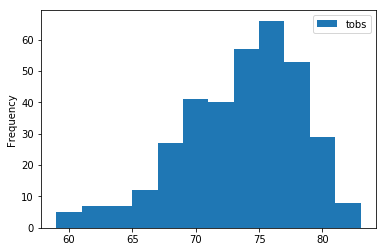

In [49]:
tobs_df.plot.hist(bins=12)
plt.show()

In [50]:
start = "2017-01-01"
end = "2017-08-01"

temp = session.query(func.avg(measurement.tobs),func.min(measurement.tobs),func.max(measurement.tobs)).\
    filter(measurement.date>=start).\
    filter(measurement.date<=end).all()
temp_df = pd.DataFrame(temp, columns=["avg","min","max"])
temp_df
description = temp_df.astype(float)

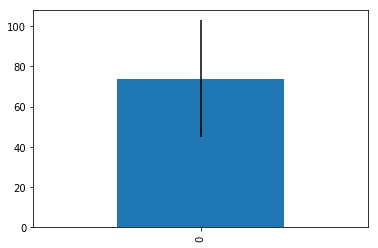

In [56]:
yerr=description["max"]-description["min"]
description["avg"].plot.bar(yerr=yerr)
plt.show()
# plt.bar(left=1,height = temp_df["avg"],yerr=yerr)